In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import fit
import hysteresis
import synthetic
import utils

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Loss function converges to 0.7605273723602295


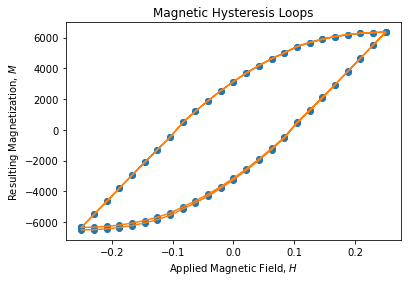

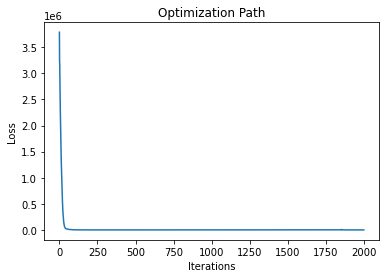

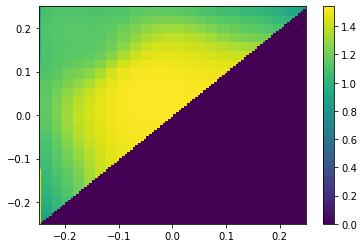

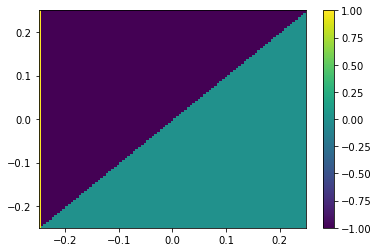

In [8]:

n_grid = 50
h_max = 0.25
h_min = 0
b_sat = 1.0

# get synthetic training h_data
h, m = synthetic.generate_saturation_dataset(25, n_grid*2, h_max, b_sat)

H = hysteresis.Hysteresis(h, -h_max, h_max, b_sat, n_grid*2)

# dummy predict
m_pred = H.predict_magnetization().detach()

fig, ax = plt.subplots()
# ax.plot(h, m_pred)
ax.plot(h, m.detach(), 'o')

# optimize
l = fit.train(H, m, 1000, .01)
m_star = H.predict_magnetization().detach()

# plot hysteresis look
ax.plot(h, m_star)
plt.title('Magnetic Hysteresis Loops')
plt.xlabel('Applied Magnetic Field, $H$')
plt.ylabel('Resulting Magnetization, $M$') 

# plot loss function
print(f"Loss function converges to {l[-1]}")
fig2, ax2 = plt.subplots()
ax2.plot(l.detach())
plt.title('Optimization Path')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# plot preisach density triangle
xx, yy = H.get_mesh()
dens = H.get_density_matrix().detach()

fig3, ax3 = plt.subplots()
d_tri = ax3.pcolor(xx, yy, dens)
fig3.colorbar(d_tri)

# plot final state triangle
states = H.get_states().detach()

fig4, ax4 = plt.subplots()
s_tri = ax4.pcolor(xx, yy, states)
fig4.colorbar(s_tri)


In [9]:
print(H.offset)
print(H.scale)

Parameter containing:
tensor(0.1994, dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor(1.0058, dtype=torch.float64, requires_grad=True)


In [4]:
# model(synthetic.generate_one_sided_dataset)

In [5]:
n_grid = 50
h_max = 0.25
h_min = 0
b_sat = 1.0

h, m = synthetic.generate_one_sided_dataset(25, n_grid*2, b_sat)

H = hysteresis.Hysteresis(h, h_min, h_max, b_sat, n_grid)
# fit.train(H, m, 2000)

dens = H.get_density_vector().detach()

print(dens)


tensor([1.3133, 1.3133, 1.3133,  ..., 1.3133, 1.3133, 1.3133],
       dtype=torch.float64)


In [6]:
if 0 in dens:
    print(True)
else:
    print(False)

False


In [7]:
d_tri=utils.vector_to_tril(dens, 100)

AssertionError: 